Step 1: Importing Libraries and loading dataset

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("market_fact.csv")

In [4]:
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


Step 2: Data Cleaning

In [5]:
# Check Shape
df.shape 

(8399, 10)

In [6]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ord_id               8399 non-null   object 
 1   Prod_id              8399 non-null   object 
 2   Ship_id              8399 non-null   object 
 3   Cust_id              8399 non-null   object 
 4   Sales                8399 non-null   float64
 5   Discount             8399 non-null   float64
 6   Order_Quantity       8399 non-null   int64  
 7   Profit               8399 non-null   float64
 8   Shipping_Cost        8399 non-null   float64
 9   Product_Base_Margin  8336 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 656.3+ KB


In [7]:
# Check missing values
df.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin    63
dtype: int64

In [8]:
# Remove Duplicates

df.drop_duplicates(inplace=True)

In [10]:
# Handle Missing Values

# Fill missing numerical values with mean
df['Sales'].fillna(df['Sales'].mean(), inplace=True)

# Fill missing numerical values with median
df['Profit'].fillna(df['Profit'].median(), inplace=True)


C:\Users\vinay\AppData\Local\Temp\ipykernel_6168\488699601.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].mean(), inplace=True)
C:\Users\vinay\AppData\Local\Temp\ipykernel_6168\488699601.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Step 3: EDA

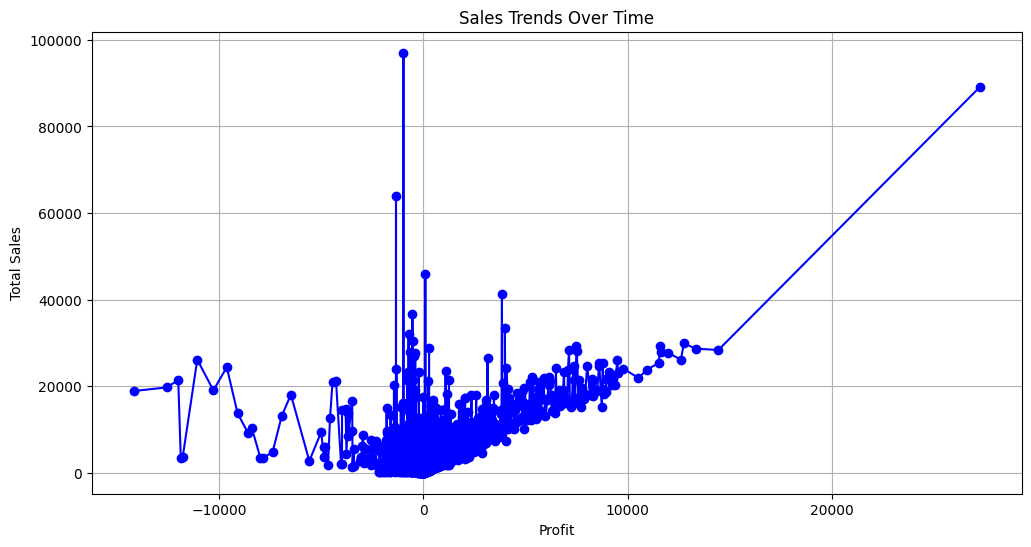

In [12]:
import matplotlib.pyplot as plt  

# Aggregate
df_grouped = df.groupby("Profit")["Sales"].sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-", color="b")
plt.xlabel("Profit")
plt.ylabel("Total Sales")
plt.title("Sales Trends Over Time")
plt.grid()
plt.show()


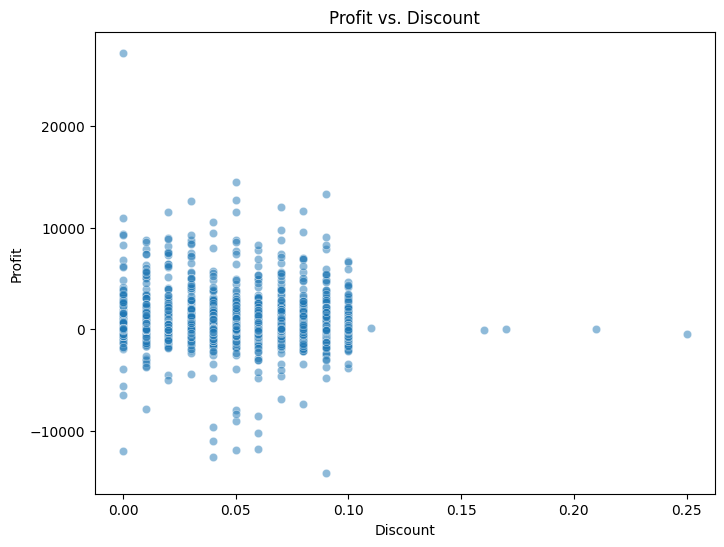

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Discount"], y=df["Profit"], alpha=0.5)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Profit vs. Discount")
plt.show()


C:\Users\vinay\AppData\Local\Temp\ipykernel_6168\1526790769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Prod_id"], y=df["Sales"], estimator=sum, palette="viridis")


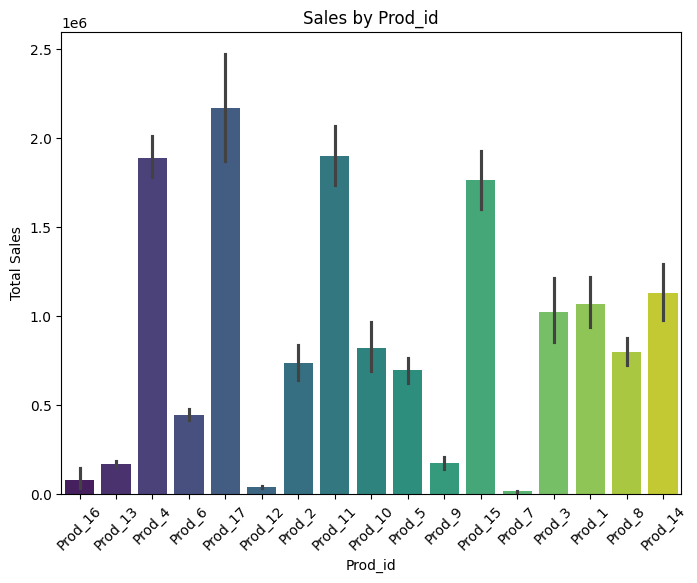

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df["Prod_id"], y=df["Sales"], estimator=sum, palette="viridis")
plt.xlabel("Prod_id")
plt.ylabel("Total Sales")
plt.title("Sales by Prod_id")
plt.xticks(rotation=45)
plt.show()


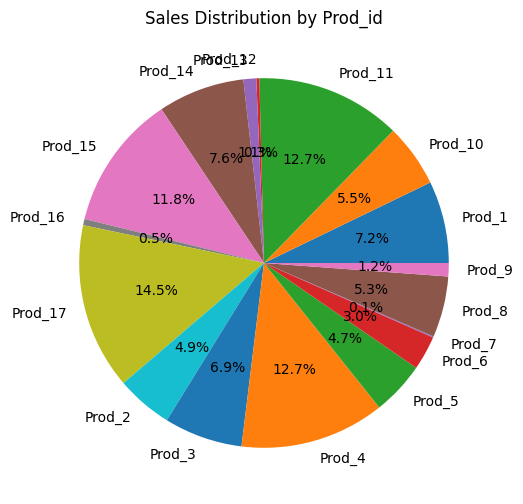

In [17]:
df.groupby("Prod_id")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6))
plt.title("Sales Distribution by Prod_id")
plt.ylabel("") 
plt.show()


Step 4: Predictive Modelling


In [22]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score, mean_squared_error  


X = df[["Profit", "Discount"]]  # Independent variables
y = df["Sales"]  # Target variable

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales on test data
y_pred = model.predict(X_test)


In [24]:
# R-squared score
r2 = r2_score(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.22
Mean Squared Error: 10031001.87


Step 5: Insights & Recommendation


C:\Users\vinay\AppData\Local\Temp\ipykernel_6168\1218742781.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_d")


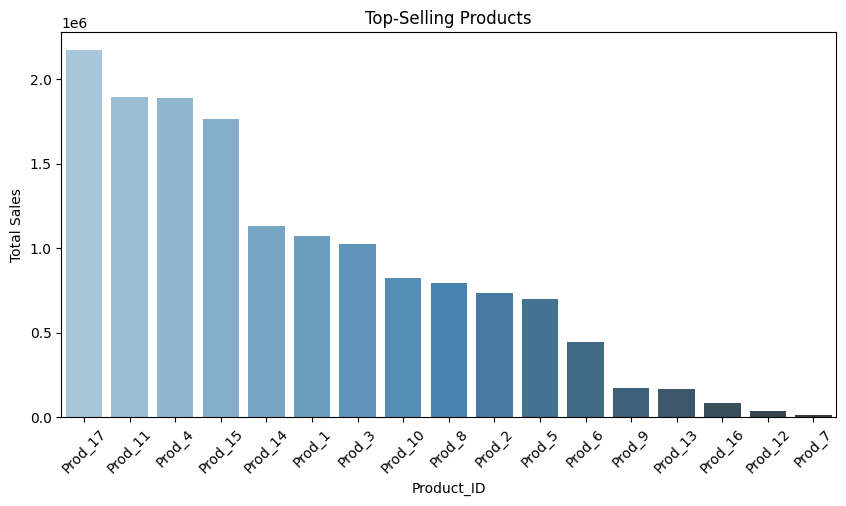

In [28]:
# Identify Best-Selling Products & Categories

# Top 5 Product Categories by Total Sales
category_sales = df.groupby("Prod_id")["Sales"].sum().sort_values(ascending=False)

# Visualizing Best-Selling Categories
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Top-Selling Products")
plt.xlabel("Product_ID")
plt.ylabel("Total Sales")
plt.show()

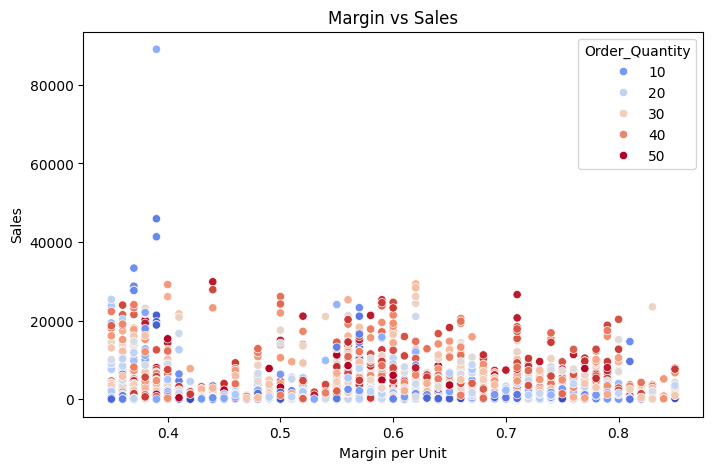

In [31]:
# Impact of Discounts on Profit

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Product_Base_Margin"], y=df["Sales"], hue=df["Order_Quantity"], palette="coolwarm")
plt.title("Margin vs Sales")
plt.xlabel("Margin per Unit")
plt.ylabel("Sales")
plt.show()

In [33]:
# Recommendations Based on Findings

print("🔹 Recommendations Based on Sales Data Analysis:")
print("1. Increase stock and marketing for top-performing product categories.")
print("2. Set an optimal discount range (e.g., avoid discounts above 20% if they reduce profit margins).")


🔹 Recommendations Based on Sales Data Analysis:
1. Increase stock and marketing for top-performing product categories.
2. Set an optimal discount range (e.g., avoid discounts above 20% if they reduce profit margins).
